# Installing Tensorflow

In [ ]:
pip install tensorflow

In [22]:
import tensorflow as tf
from __future__ import absolute_import, division, print_function, unicode_literals
print(tf.version)

<module 'tensorflow._api.v2.version' from 'C:\\Users\\hp\\anaconda31\\Lib\\site-packages\\tensorflow\\_api\\v2\\version\\__init__.py'>


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow.compat.v2.feature_column as fc
import warnings
warnings.filterwarnings("ignore")
from IPython.display import clear_output

# 📁 Dataset

In [24]:
dff=pd.read_csv("tested.csv")
dff.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [25]:
dff.shape

(418, 12)

In [26]:
dff.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [27]:
#check missing values
dff.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [28]:
#remove all missing values
#put mean values for Age, Fare column
#put "None" for Cabin column

In [29]:
dff['Age'].fillna(dff['Age'].mean(),inplace=True)

In [30]:
dff['Cabin'].fillna("None",inplace=True)

In [31]:
dff['Fare'].fillna(dff['Fare'].mean(),inplace=True)

In [32]:
dff.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [33]:
dff.duplicated().sum()

0

In [34]:
#split df dataframe into a test and train dataframe.
from sklearn.model_selection import train_test_split

In [35]:
df,df_test=train_test_split(dff,test_size=0.2)

In [36]:
#change index of test dataframe to start from 0 
df_test.index=np.arange(0,len(df_test))

In [37]:
df_test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,918,1,1,"Ostby, Miss. Helene Ragnhild",female,22.00000,0,1,113509,61.9792,B36,C
1,1133,1,2,"Christy, Mrs. (Alice Frances)",female,45.00000,0,2,237789,30.0000,None,S
2,1252,0,3,"Sage, Master. William Henry",male,14.50000,8,2,CA. 2343,69.5500,None,S
3,990,1,3,"Braf, Miss. Elin Ester Maria",female,20.00000,0,0,347471,7.8542,None,S
4,1052,1,3,"Smyth, Miss. Julia",female,30.27259,0,0,335432,7.7333,None,Q


In [38]:
y_train=df["Survived"]
y_test=df_test["Survived"]

In [39]:
df.shape

(334, 12)

In [40]:
df_test.shape

(84, 12)

# Data Visualization 📊📈📉

<Axes: xlabel='Survived', ylabel='count'>

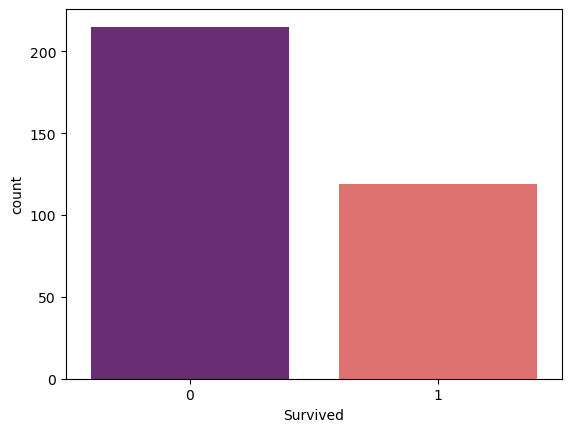

In [20]:
sns.countplot(x="Survived",data=df,palette="magma")

<Axes: xlabel='Sex', ylabel='count'>

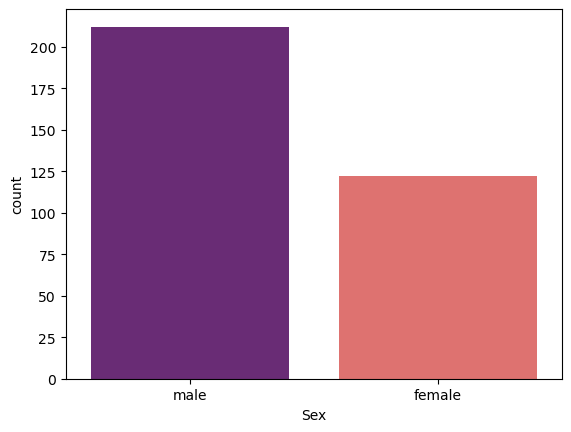

In [21]:
sns.countplot(x="Sex",data=df,palette="magma")

<Axes: >

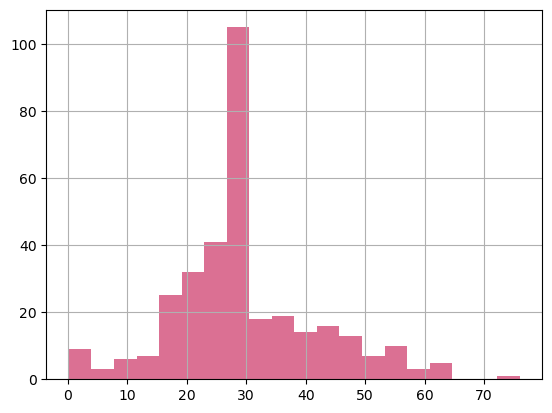

In [22]:
df.Age.hist(bins=20 , color="palevioletred")

<Axes: xlabel='Pclass', ylabel='count'>

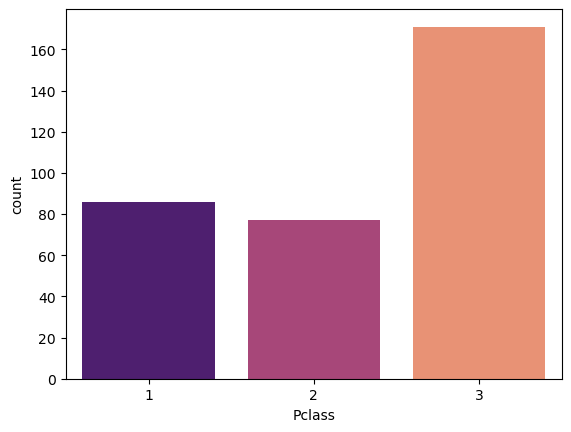

In [23]:
sns.countplot(data=df,x="Pclass",palette="magma")

Text(0.5, 0, '% survival')

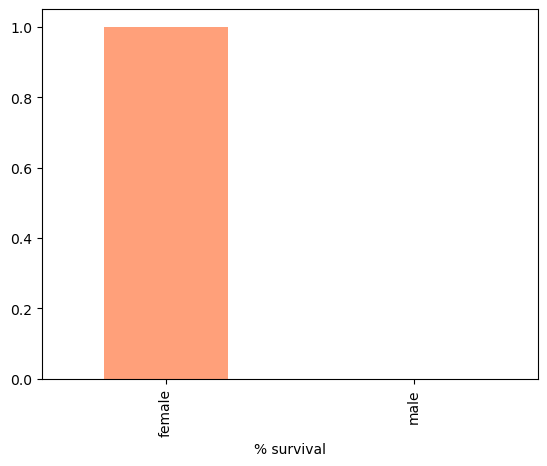

In [24]:
df.groupby("Sex").Survived.mean().plot(kind="bar",color="lightsalmon").set_xlabel("% survival")

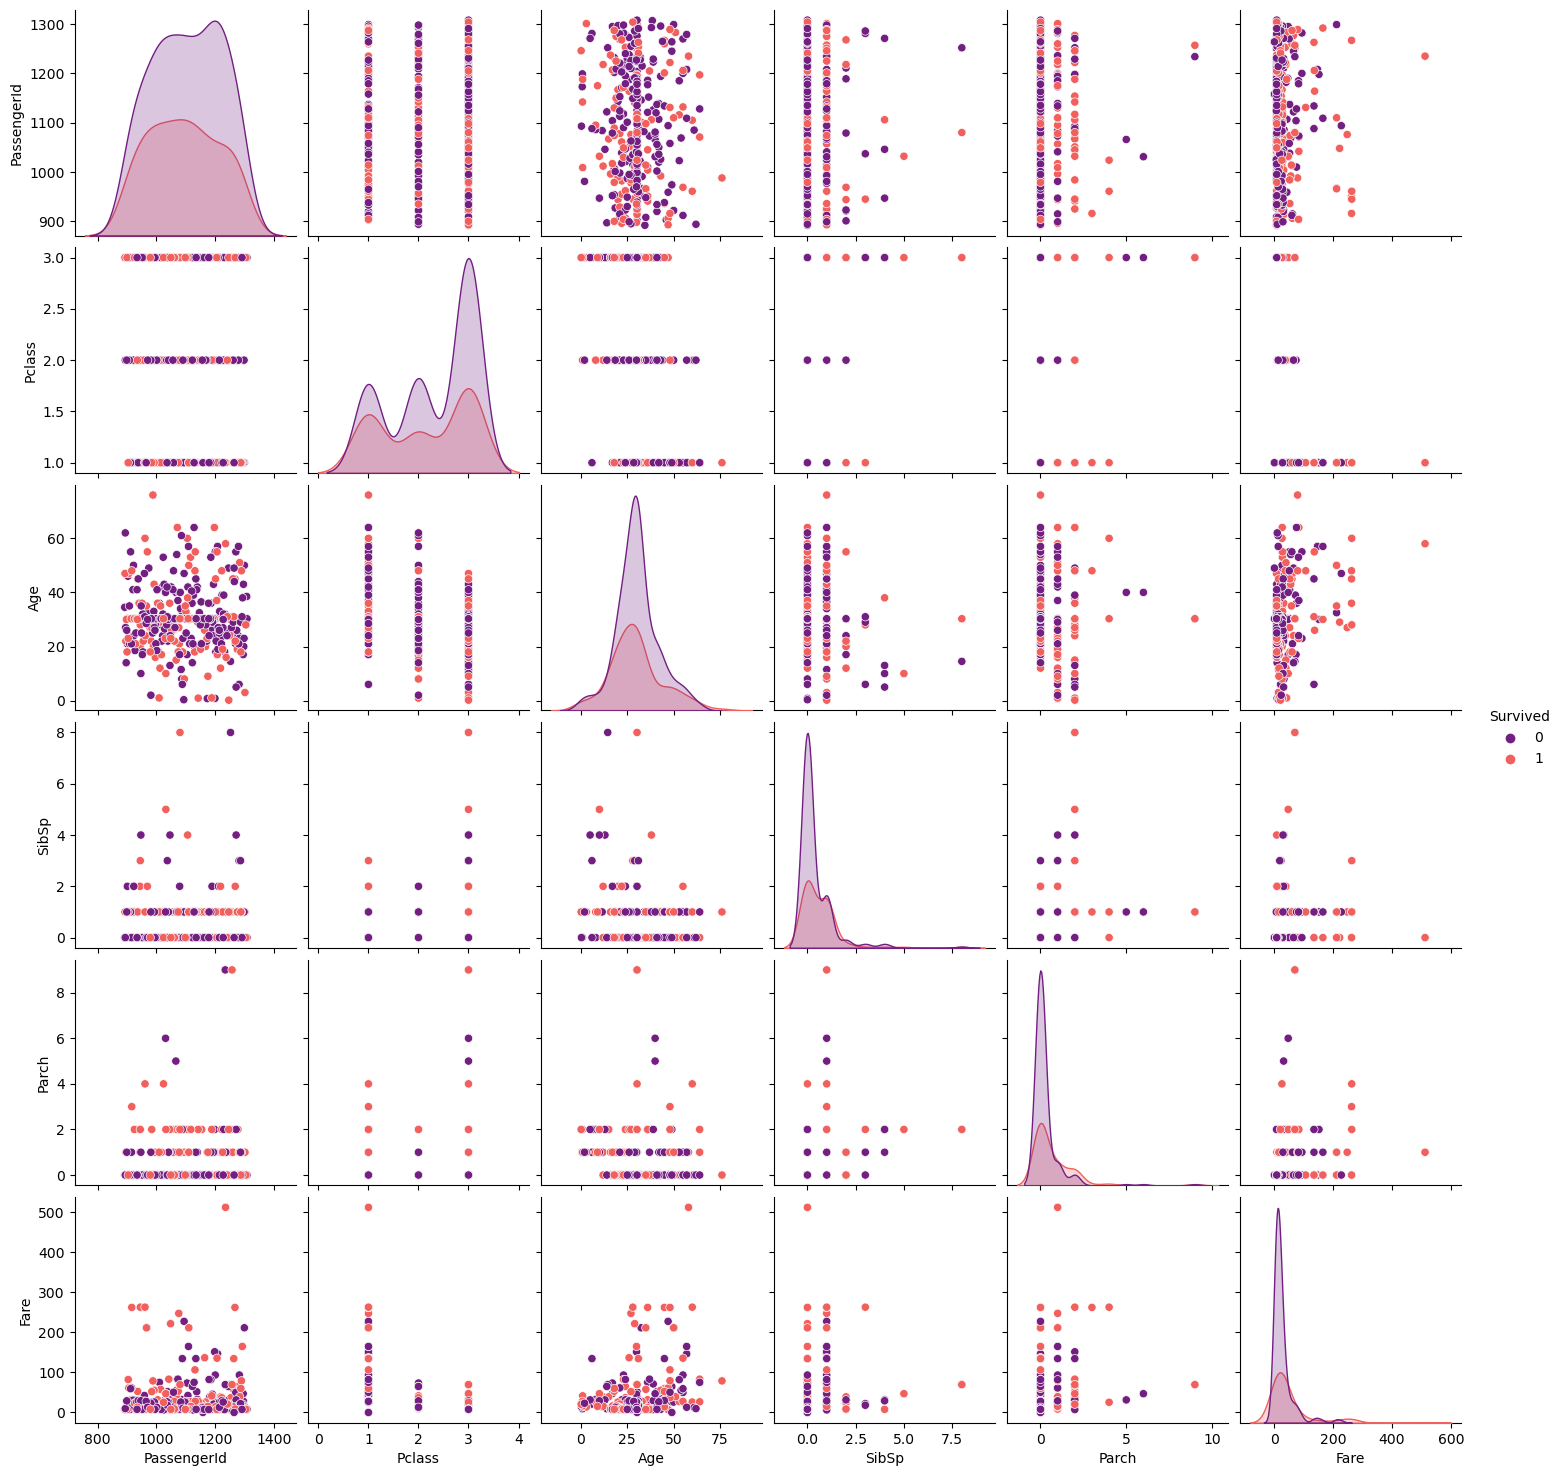

In [25]:
sns.pairplot(df,hue="Survived",palette="magma")

### After analyzing this information, we should notice the following:

Most passengers are in their 20's or 30's

Most passengers are male

Most passengers are in "Third" class

Females have a much higher chance of survival

# 🛠️ Feature Engineering 

In [41]:
categorical_col=['PassengerId','Sex','Cabin', 'Embarked','SibSp','Parch', 'Ticket',]
numerical_col = ['Pclass','Age','Fare']
feature_col=[]
for feature_name in categorical_col:
    vocabulary=df[feature_name].unique()  # gets a list of all unique values from given feature column
    feature_col.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name , vocabulary))
    
for feature_name in numerical_col:
    feature_col.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))
 
print(feature_col)


Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.
Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.
[VocabularyListCategoricalColumn(key='PassengerId', vocabulary_list=(1226, 937, 1097, 1086, 996, 1060, 1235, 1054, 984, 1039, 1124, 987, 1034, 1200, 960, 1074, 1148, 1004, 1159, 1126, 1019, 1096, 1020, 1149, 1164, 1041, 1119, 1264, 1241, 1277, 1110, 1152, 1266, 955, 1221, 1069, 926, 909, 1044, 1176, 949, 1168, 959, 1062, 1008, 1294, 1043, 1194, 923, 905, 1300, 1076, 1093, 1130, 1009, 1112, 1192, 994, 1179, 1049, 1289, 1207, 1162, 1230, 1250, 991, 917, 946, 1242,

# 🛠️Input Function
The TensorFlow model we are going to use requires that the data we pass it comes in as a tf.data.Dataset object. This means we must create a input function that can convert our current pandas dataframe into that object.

In [42]:
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
  def input_function():  # inner function, this will be returned
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))  # create tf.data.Dataset object with data and its label
    if shuffle:
      ds = ds.shuffle(1000)  # randomize order of data
    ds = ds.batch(batch_size).repeat(num_epochs)  # split dataset into batches of 32 and repeat process for number of epochs
    return ds  # return a batch of the dataset
  return input_function  # return a function object for use

train_input_fn = make_input_fn(df, y_train)  # here we will call the input_function that was returned to us to get a dataset object we can feed to the model
eval_input_fn = make_input_fn(df_test, y_test, num_epochs=1, shuffle=False)

# 📈 Creating Model

In [43]:
model=tf.estimator.LinearClassifier(feature_columns=feature_col)

Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\hp\\AppData\\Local\\Temp\\tmpbd0s2kqq', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task

# Training

In [44]:
model.train(train_input_fn)

INFO:tensorflow:Calling model_fn.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.keras instead.
INFO:tensorflow:Done calling model_fn.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
INFO:tensorflow:Create CheckpointSaverHook.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\hp\AppData\Local\Temp\tmpbd0s2kqq\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
Instructions for updating:
Use tf.keras instead.
Ins

In [45]:
result=model.evaluate(eval_input_fn)
clear_output()
print(result["accuracy"])

1.0


# 🧪Model Evaluation 


INFO:tensorflow:Calling model_fn.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\hp\AppData\Local\Temp\tmpbd0s2kqq\model.ckpt-110
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


<Axes: title={'center': 'predicted probabilities'}, ylabel='Frequency'>

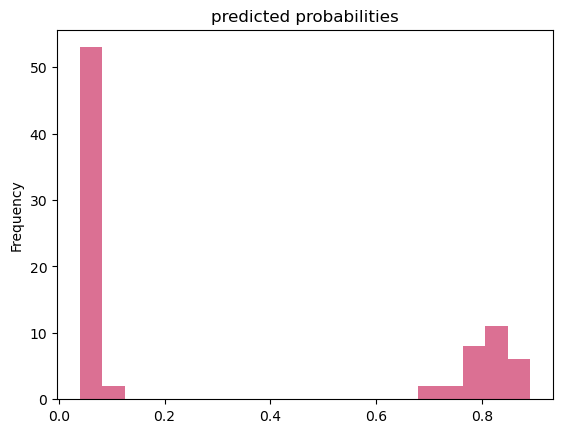

In [46]:
pre_dictes=list(model.predict(eval_input_fn))
probs = pd.Series([pred['probabilities'][1] for pred in pre_dictes])
probs.plot(kind='hist', bins=20, title='predicted probabilities',color="palevioletred")

# 🎯Model Predictions 

In [47]:
print(df_test.loc[6])
print(pre_dictes[6]["probabilities"][1])

PassengerId                          1003
Survived                                1
Pclass                                  3
Name           Shine, Miss. Ellen Natalia
Sex                                female
Age                              30.27259
SibSp                                   0
Parch                                   0
Ticket                             330968
Fare                               7.7792
Cabin                                None
Embarked                                Q
Name: 6, dtype: object
0.83033204
